In [281]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns

In [282]:
full_df = pd.read_csv("public_company_topic_modeling_data.csv")
full_df.head()

,stock_ticker,long_business_summary,full_time_employees,sector,total_revenue,country,financial_currency,52_week_change,debt_to_equity,ebitda_margins,current_ratio,tokenized,lemmatized,vec1,vec2,vec3,vec4,vec5
0,RCL,Royal Caribbean Group operates as a cruise com...,84900.0,Consumer Cyclical,9.337800e+07,United States,USD,0.364917,276.117,0.00000,1.070,"['Caribbean', 'Group', 'operates', 'cruise', '...","['caribbean', 'group', 'cruise', 'cruise', 'ro...",1.039311,0.682399,3.499001,1.104250,2.063452
1,TWN,"The Taiwan Fund, Inc. is a closed-ended equity...",NaN,Financial Services,3.919780e+06,Hong Kong,USD,0.584649,NaN,0.00000,3.045,"['Taiwan', 'Fund', 'Inc', 'is', 'ended', 'equi...","['taiwan', 'equity', 'launched', 'managed', 'j...",-1.250581,-5.019404,0.314977,-6.698628,0.085419
2,GLOP,"GasLog Partners LP owns, operates, and acquire...",NaN,Energy,3.153010e+08,Greece,USD,0.126027,125.137,0.68247,0.773,"['GasLog', 'Partners', 'LP', 'owns', 'operates...","['gaslog', 'partners', 'lp', 'owns', 'acquires...",3.318201,2.670848,0.716679,-0.908848,3.308798
3,LFG,Rice Acquisition Corp. does not have significa...,NaN,Utilities,NaN,United States,USD,0.942495,NaN,0.00000,4.972,"['Rice', 'Acquisition', 'Corp', 'does', 'have'...","['rice', 'acquisition', 'corp', 'doe', 'operat...",1.172377,0.193258,-0.523927,-3.202907,-1.554393
4,BTCM,BIT Mining Limited operates as a cryptocurrenc...,138.0,Technology,2.908581e+09,Hong Kong,CNY,2.476191,14.959,-0.02542,1.157,"['BIT', 'Mining', 'Limited', 'operates', 'cryp...","['bit', 'mining', 'limited', 'cryptocurrency',...",10.790651,0.600182,-3.694256,-4.438946,5.234321


In [283]:
full_df.isna().sum()

stock_ticker              0
long_business_summary     0
full_time_employees      41
sector                    1
total_revenue            15
country                   0
financial_currency        4
52_week_change           89
debt_to_equity           31
ebitda_margins            0
current_ratio            10
tokenized                 0
lemmatized                0
vec1                      0
vec2                      0
vec3                      0
vec4                      0
vec5                      0
dtype: int64

In [284]:
full_df.describe()

,full_time_employees,total_revenue,52_week_change,debt_to_equity,ebitda_margins,current_ratio,vec1,vec2,vec3,vec4,vec5
count,95.000000,1.210000e+02,47.000000,105.000000,136.000000,126.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,26993.842105,9.134347e+09,0.282865,131.559486,0.111634,1.987611,2.864065,1.814891,1.537556,-5.827920,1.054164
std,64215.819058,2.319965e+10,0.475517,162.525389,0.350676,1.833389,5.079207,5.094187,4.270802,4.385321,5.896099
min,14.000000,3.752730e+05,-0.496078,0.331000,-2.665490,0.005000,-8.782480,-9.681684,-13.788993,-21.207973,-15.851612
25%,810.000000,1.492630e+08,0.034296,34.353000,0.000000,0.961750,-0.895093,-1.790911,-0.662590,-8.163611,-2.416395
50%,6800.000000,1.029000e+09,0.142753,77.218000,0.085105,1.486500,1.968148,1.426193,1.676285,-5.205878,1.611938
75%,29800.000000,6.353000e+09,0.424862,159.268000,0.197188,2.266500,4.976469,4.292731,4.027429,-2.610543,4.141603
max,540000.000000,1.760150e+11,2.476191,937.366000,0.955050,10.596000,20.517614,16.124361,15.836949,1.154542,18.111012


In [285]:
model_features = ['vec1','vec2','vec3','vec4','vec5']
minimum_cluster_size = 2 * len(model_features)

In [286]:
# Dropping rows that have null values in any of the feature columns
full_df = full_df.dropna(axis=0, subset=model_features)
print("Remaining Rows:",len(full_df))

Remaining Rows: 136


In [287]:
ml_df = full_df[model_features]

In [288]:
ml_df_scaled = StandardScaler(with_mean=0, with_std=1).fit_transform(ml_df)
ml_df_scaled = pd.DataFrame(ml_df_scaled)
ml_df_scaled = ml_df_scaled.rename(columns={0:'vec1_scaled',1:'vec2_scaled',2:'vec3_scaled',3:'vec4_scaled',\
                           4:'vec5_scaled' })
ml_df_scaled.head()

,vec1_scaled,vec2_scaled,vec3_scaled,vec4_scaled,vec5_scaled
0,0.205377,0.134452,0.822313,0.252737,0.351263
1,-0.247126,-0.988962,0.074024,-1.533159,0.014541
2,0.655706,0.526231,0.168429,-0.208014,0.563259
3,0.231672,0.038077,-0.123130,-0.733070,-0.264605
4,2.132329,0.118253,-0.868201,-1.015970,0.891042


In [289]:
neighbors = NearestNeighbors(n_neighbors=minimum_cluster_size)
neighbors_fit = neighbors.fit(ml_df_scaled)
distances, indices = neighbors_fit.kneighbors(ml_df_scaled)


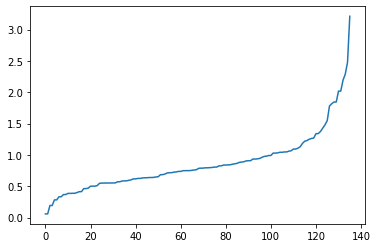

In [290]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [291]:
distances_df = pd.DataFrame()
distances_df['distances'] = distances
distances_df.reset_index(inplace=True)

In [292]:
distances_array = distances_df.to_numpy()
distances_array

array([[0.00000000e+00, 5.90702704e-02],
       [1.00000000e+00, 5.90702704e-02],
       [2.00000000e+00, 1.93514057e-01],
       [3.00000000e+00, 1.93514057e-01],
       [4.00000000e+00, 2.82694910e-01],
       [5.00000000e+00, 2.82694910e-01],
       [6.00000000e+00, 3.32608329e-01],
       [7.00000000e+00, 3.32608329e-01],
       [8.00000000e+00, 3.67673433e-01],
       [9.00000000e+00, 3.67673433e-01],
       [1.00000000e+01, 3.86256384e-01],
       [1.10000000e+01, 3.86256384e-01],
       [1.20000000e+01, 3.88158037e-01],
       [1.30000000e+01, 3.88158037e-01],
       [1.40000000e+01, 3.99346363e-01],
       [1.50000000e+01, 4.14054229e-01],
       [1.60000000e+01, 4.14054229e-01],
       [1.70000000e+01, 4.62894437e-01],
       [1.80000000e+01, 4.62894437e-01],
       [1.90000000e+01, 4.70105911e-01],
       [2.00000000e+01, 5.01022242e-01],
       [2.10000000e+01, 5.01022242e-01],
       [2.20000000e+01, 5.01746162e-01],
       [2.30000000e+01, 5.11429047e-01],
       [2.400000

In [293]:
# Functions to find best EPS value based on KNN
def find_elbow(data, theta):

    # make rotation matrix
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))

    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)

    # return index of elbow
    return np.where(rotated_vector == rotated_vector.min())[0][0]

def get_data_radiant(data):
    return np.arctan2(data[:, 1].max() - data[:, 1].min(), 
                    data[:, 0].max() - data[:, 0].min())


In [294]:
# Finding the elbow point of graph
elbow_index = find_elbow(distances_array, get_data_radiant(distances_array))
print(elbow_index)

119


In [295]:
best_eps = distances_df.distances[elbow_index]
print(best_eps)

1.267874510120305


In [296]:
model = DBSCAN(eps=best_eps, min_samples=minimum_cluster_size,metric='euclidean')
model.fit(ml_df_scaled)

DBSCAN(eps=1.267874510120305, min_samples=10)

In [297]:
model.__dict__

{'eps': 1.267874510120305,
 'min_samples': 10,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'p': None,
 'n_jobs': None,
 'n_features_in_': 5,
 'core_sample_indices_': array([  0,   1,   2,   3,   6,   8,   9,  10,  11,  13,  20,  21,  23,
         25,  27,  31,  32,  33,  34,  37,  38,  39,  40,  41,  43,  45,
         48,  49,  51,  52,  54,  55,  62,  66,  69,  72,  76,  82,  87,
         88,  93,  98, 100, 108, 109, 116, 117, 118, 120, 124, 125, 126,
        127, 130, 132, 135]),
 'labels_': array([ 0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0,
         0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,
        -1,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1, -1, -1,  0,  0, -1,
        -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,
 

In [298]:
#how many companies are in each cluster?
from collections import Counter
Counter(model.labels_.tolist())

Counter({0: 88, -1: 48})

In [299]:
ml_df_scaled['dbscan_cluster'] = model.labels_.tolist()

In [300]:
output_df = ml_df_scaled.merge(full_df,left_index=True, right_index=True)
output_df.head(10)

,vec1_scaled,vec2_scaled,vec3_scaled,vec4_scaled,vec5_scaled,dbscan_cluster,stock_ticker,long_business_summary,full_time_employees,sector,...,debt_to_equity,ebitda_margins,current_ratio,tokenized,lemmatized,vec1,vec2,vec3,vec4,vec5
0,0.205377,0.134452,0.822313,0.252737,0.351263,0,RCL,Royal Caribbean Group operates as a cruise com...,84900.0,Consumer Cyclical,...,276.117,0.00000,1.070,"['Caribbean', 'Group', 'operates', 'cruise', '...","['caribbean', 'group', 'cruise', 'cruise', 'ro...",1.039311,0.682399,3.499001,1.104250,2.063452
1,-0.247126,-0.988962,0.074024,-1.533159,0.014541,0,TWN,"The Taiwan Fund, Inc. is a closed-ended equity...",NaN,Financial Services,...,NaN,0.00000,3.045,"['Taiwan', 'Fund', 'Inc', 'is', 'ended', 'equi...","['taiwan', 'equity', 'launched', 'managed', 'j...",-1.250581,-5.019404,0.314977,-6.698628,0.085419
2,0.655706,0.526231,0.168429,-0.208014,0.563259,0,GLOP,"GasLog Partners LP owns, operates, and acquire...",NaN,Energy,...,125.137,0.68247,0.773,"['GasLog', 'Partners', 'LP', 'owns', 'operates...","['gaslog', 'partners', 'lp', 'owns', 'acquires...",3.318201,2.670848,0.716679,-0.908848,3.308798
3,0.231672,0.038077,-0.123130,-0.733070,-0.264605,0,LFG,Rice Acquisition Corp. does not have significa...,NaN,Utilities,...,NaN,0.00000,4.972,"['Rice', 'Acquisition', 'Corp', 'does', 'have'...","['rice', 'acquisition', 'corp', 'doe', 'operat...",1.172377,0.193258,-0.523927,-3.202907,-1.554393
4,2.132329,0.118253,-0.868201,-1.015970,0.891042,-1,BTCM,BIT Mining Limited operates as a cryptocurrenc...,138.0,Technology,...,14.959,-0.02542,1.157,"['BIT', 'Mining', 'Limited', 'operates', 'cryp...","['bit', 'mining', 'limited', 'cryptocurrency',...",10.790651,0.600182,-3.694256,-4.438946,5.234321
5,0.893438,1.317323,0.464871,-1.462707,1.270705,0,SFL,"SFL Corporation Ltd. engages in the ownership,...",14.0,Industrials,...,249.118,0.65464,1.079,"['Corporation', 'Ltd', 'engages', 'ownership',...","['ltd', 'engages', 'ownership', 'operation', '...",4.521241,6.685973,1.978058,-6.390811,7.464607
6,0.007979,-1.566464,0.549814,-1.850940,0.584114,0,BIF,"Boulder Growth & Income Fund, Inc. is a closed...",NaN,Financial Services,...,14.136,0.00000,0.479,"['Boulder', 'Growth', 'Income', 'Fund', 'Inc',...","['boulder', 'growth', 'balanced', 'launched', ...",0.040376,-7.950470,2.339500,-8.087067,3.431307
7,-0.312525,0.838279,-0.030378,-2.027195,-1.376726,-1,STE,STERIS plc provides infection prevention and o...,13000.0,Healthcare,...,58.290,0.26417,1.754,"['STERIS', 'plc', 'provides', 'infection', 'pr...","['steris', 'plc', 'infection', 'prevention', '...",-1.581533,4.254619,-0.129259,-8.857157,-8.087415
8,-0.252084,-0.302717,0.481513,-0.511043,-0.279342,0,TPGY,TPG Pace Beneficial Finance Corp. focuses on e...,NaN,Financial Services,...,NaN,0.00000,0.005,"['TPG', 'Pace', 'Beneficial', 'Finance', 'Corp...","['tpg', 'pace', 'beneficial', 'finance', 'corp...",-1.275671,-1.536415,2.048870,-2.232834,-1.640962
9,-0.135527,-0.290532,0.173569,-1.139031,-0.090498,0,BITE,Bite Acquisition Corp. focuses on effecting a ...,NaN,Financial Services,...,NaN,0.00000,0.178,"['Bite', 'Acquisition', 'Corp', 'focuses', 'ef...","['bite', 'acquisition', 'corp', 'focus', 'effe...",-0.685833,-1.474573,0.738550,-4.976618,-0.531622


In [301]:
output_df.to_csv("public_company_unsupervised_topic_modeling.csv",index=False)